## Vian.ai Online Assessment
Jingtian (Ryan) Zhou

In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## 1. Characterize the data and comment about its quality

In [9]:
df = pd.read_csv('green_tripdata_2015-09.csv')
print(df.shape)
df.head()

(1494926, 21)


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


In [10]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type '],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494926 entries, 0 to 1494925
Data columns (total 21 columns):
VendorID                 1494926 non-null int64
lpep_pickup_datetime     1494926 non-null object
Lpep_dropoff_datetime    1494926 non-null object
Store_and_fwd_flag       1494926 non-null object
RateCodeID               1494926 non-null int64
Pickup_longitude         1494926 non-null float64
Pickup_latitude          1494926 non-null float64
Dropoff_longitude        1494926 non-null float64
Dropoff_latitude         1494926 non-null float64
Passenger_count          1494926 non-null int64
Trip_distance            1494926 non-null float64
Fare_amount              1494926 non-null float64
Extra                    1494926 non-null float64
MTA_tax                  1494926 non-null float64
Tip_amount               1494926 non-null float64
Tolls_amount             1494926 non-null float64
Ehail_fee                0 non-null float64
improvement_surcharge    1494926 non-null float64
To

In [12]:
df.describe()

,VendorID,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
count,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,1.494926e+06,0.0,1.494926e+06,1.494926e+06,1.494926e+06,1.494922e+06
mean,1.782045e+00,1.097653e+00,-7.383084e+01,4.069114e+01,-7.383728e+01,4.069291e+01,1.370598e+00,2.968141e+00,1.254320e+01,3.512800e-01,4.866408e-01,1.235727e+00,1.231047e-01,NaN,2.920991e-01,1.503215e+01,1.540559e+00,1.022353e+00
std,4.128570e-01,6.359437e-01,2.776082e+00,1.530882e+00,2.677911e+00,1.476698e+00,1.039426e+00,3.076621e+00,1.008278e+01,3.663096e-01,8.504473e-02,2.431476e+00,8.910137e-01,NaN,5.074009e-02,1.155316e+01,5.232935e-01,1.478288e-01
min,1.000000e+00,1.000000e+00,-8.331908e+01,0.000000e+00,-8.342784e+01,0.000000e+00,0.000000e+00,0.000000e+00,-4.750000e+02,-1.000000e+00,-5.000000e-01,-5.000000e+01,-1.529000e+01,NaN,-3.000000e-01,-4.750000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,-7.395961e+01,4.069895e+01,-7.396782e+01,4.069878e+01,1.000000e+00,1.100000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,8.160000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.394536e+01,4.074674e+01,-7.394504e+01,4.074728e+01,1.000000e+00,1.980000e+00,9.500000e+00,5.000000e-01,5.000000e-01,0.000000e+00,0.000000e+00,NaN,3.000000e-01,1.176000e+01,2.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,-7.391748e+01,4.080255e+01,-7.391013e+01,4.079015e+01,1.000000e+00,3.740000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,NaN,3.000000e-01,1.830000e+01,2.000000e+00,1.000000e+00
max,2.000000e+00,9.900000e+01,0.000000e+00,4.317726e+01,0.000000e+00,4.279934e+01,9.000000e+00,6.031000e+02,5.805000e+02,1.200000e+01,5.000000e-01,3.000000e+02,9.575000e+01,NaN,3.000000e-01,5.813000e+02,5.000000e+00,2.000000e+00


In [13]:
for col in df.columns:
    uniques = sorted(df[col].unique())
    print('{0:25} {1:10d}\t'.format(col, len(uniques)),uniques[:3])

VendorID                           2	 [1, 2]
lpep_pickup_datetime         1079075	 ['2015-09-01 00:00:00', '2015-09-01 00:00:04', '2015-09-01 00:00:06']
Lpep_dropoff_datetime        1077210	 ['2015-09-01 00:00:00', '2015-09-01 00:01:43', '2015-09-01 00:02:38']
Store_and_fwd_flag                 2	 ['N', 'Y']
RateCodeID                         7	 [1, 2, 3]
Pickup_longitude               31519	 [-83.31907653808595, -83.27787780761719, -75.3724365234375]
Pickup_latitude                70340	 [0.0, 39.35693740844727, 39.95724868774415]
Dropoff_longitude              40641	 [-83.42784118652342, -83.27783203125, -76.12158966064453]
Dropoff_latitude               80568	 [0.0, 39.429359436035156, 39.9566535949707]
Passenger_count                   10	 [0, 1, 2]
Trip_distance                   3210	 [0.0, 0.01, 0.02]
Fare_amount                     1035	 [-475.0, -450.0, -400.0]
Extra                              9	 [-1.0, -0.72, -0.5]
MTA_tax                            3	 [-0.5, 0.0, 0.5]
Tip_

### Generally speaking, the dataset's quality is ok, except there are two columns that contain null values, which are Ehail_fee and Trip_type. Beside, there exist many invalid values in the table, for example, there are values in Pickup_latitude, Dropoff_latitude, Passenger_count and Trip_distance that equals 0, and values in Total_amount smaller than 0, which is impossible to happen in real life. Moreover, we can find from the describe function of the dataset that there exist many anomalous data points. For more details of the dataset, we can explore them in the EDA stage.

### Since it was mentioned in question 5 about finding anomalies, outliers in the dataset were not completely removed for now.

In [14]:
df.drop(['Ehail_fee'], axis=1, inplace=True)
df.rename(columns = {'lpep_pickup_datetime':'Pickup_datetime', 'Lpep_dropoff_datetime':'Dropoff_datetime', \
                     'Trip_type ':'Trip_type'}, inplace = True)
df.dropna(subset=['Trip_type'], inplace=True)
df = df.loc[(df['Pickup_latitude'] != 0) & (df['Dropoff_latitude'] != 0) &
            (df['Passenger_count'] != 0) & (df['Trip_distance'] != 0)]
df = df.loc[(df['Fare_amount']>0) & (df['Extra']>=0) & (df['MTA_tax']>=0) & \
            (df['Tip_amount']>=0) & (df['Tolls_amount']>=0) & \
            (df['improvement_surcharge']>=0) & (df['Total_amount']>0)]
df['Pickup_datetime'] = pd.to_datetime(df['Pickup_datetime'])
df['Dropoff_datetime'] = pd.to_datetime(df['Dropoff_datetime'])
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466903 entries, 0 to 1466902
Data columns (total 20 columns):
VendorID                 1466903 non-null int64
Pickup_datetime          1466903 non-null datetime64[ns]
Dropoff_datetime         1466903 non-null datetime64[ns]
Store_and_fwd_flag       1466903 non-null object
RateCodeID               1466903 non-null int64
Pickup_longitude         1466903 non-null float64
Pickup_latitude          1466903 non-null float64
Dropoff_longitude        1466903 non-null float64
Dropoff_latitude         1466903 non-null float64
Passenger_count          1466903 non-null int64
Trip_distance            1466903 non-null float64
Fare_amount              1466903 non-null float64
Extra                    1466903 non-null float64
MTA_tax                  1466903 non-null float64
Tip_amount               1466903 non-null float64
Tolls_amount             1466903 non-null float64
improvement_surcharge    1466903 non-null float64
Total_amount             14669

In [15]:
df.head()

,VendorID,Pickup_datetime,Dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,0.59,4.0,0.5,0.5,0.50,0.0,0.3,5.80,1,1.0
1,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0
2,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,0.61,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2,1.0
3,2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297,40.808186,-73.937668,40.821198,1,1.07,5.5,0.5,0.5,1.36,0.0,0.3,8.16,1,1.0
4,2,2015-09-01 00:00:52,2015-09-01 00:05:50,N,1,-73.890877,40.746426,-73.876923,40.756306,1,1.43,6.5,0.5,0.5,0.00,0.0,0.3,7.80,1,1.0


## 2. Explore and visualize the data

In [19]:
#Here I assume the pickup and dropoff date are the same.
df['dayofweek'] = df['Pickup_datetime'].apply(lambda x: x.dayofweek)

Text(0.5, 1.0, 'Count Plot of dayofweek')

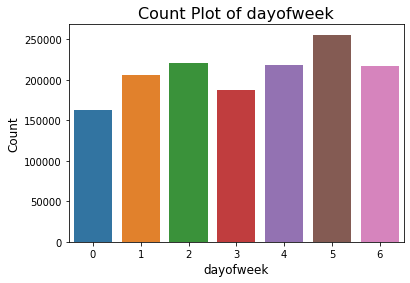

In [11]:
# visualization of 'dayofweek'
fig, ax = plt.subplots(nrows=1, ncols=1)
sns.countplot(x='dayofweek', data=df, ax=ax)
ax.set_xlabel('dayofweek', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Count Plot of dayofweek', fontsize=16)

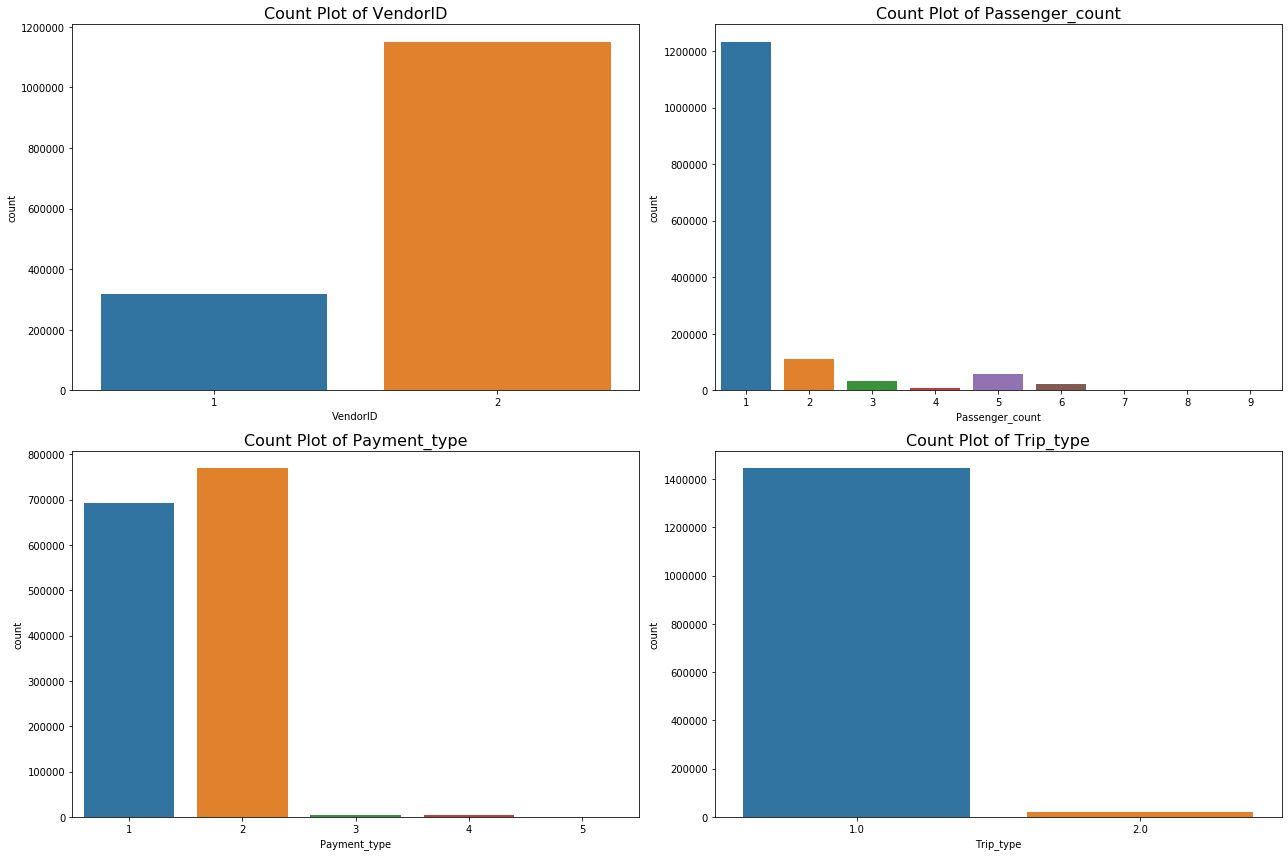

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
sns.countplot(x='VendorID', data=df, ax=ax[0,0])
ax[0,0].set_title('Count Plot of VendorID', fontsize=16)

sns.countplot(x='Passenger_count', data=df, ax=ax[0,1])
ax[0,1].set_title('Count Plot of Passenger_count', fontsize=16)

sns.countplot(x='Payment_type', data=df, ax=ax[1,0])
ax[1,0].set_title('Count Plot of Payment_type', fontsize=16)

sns.countplot(x='Trip_type', data=df, ax=ax[1,1])
ax[1,1].set_title('Count Plot of Trip_type', fontsize=16)
plt.tight_layout()

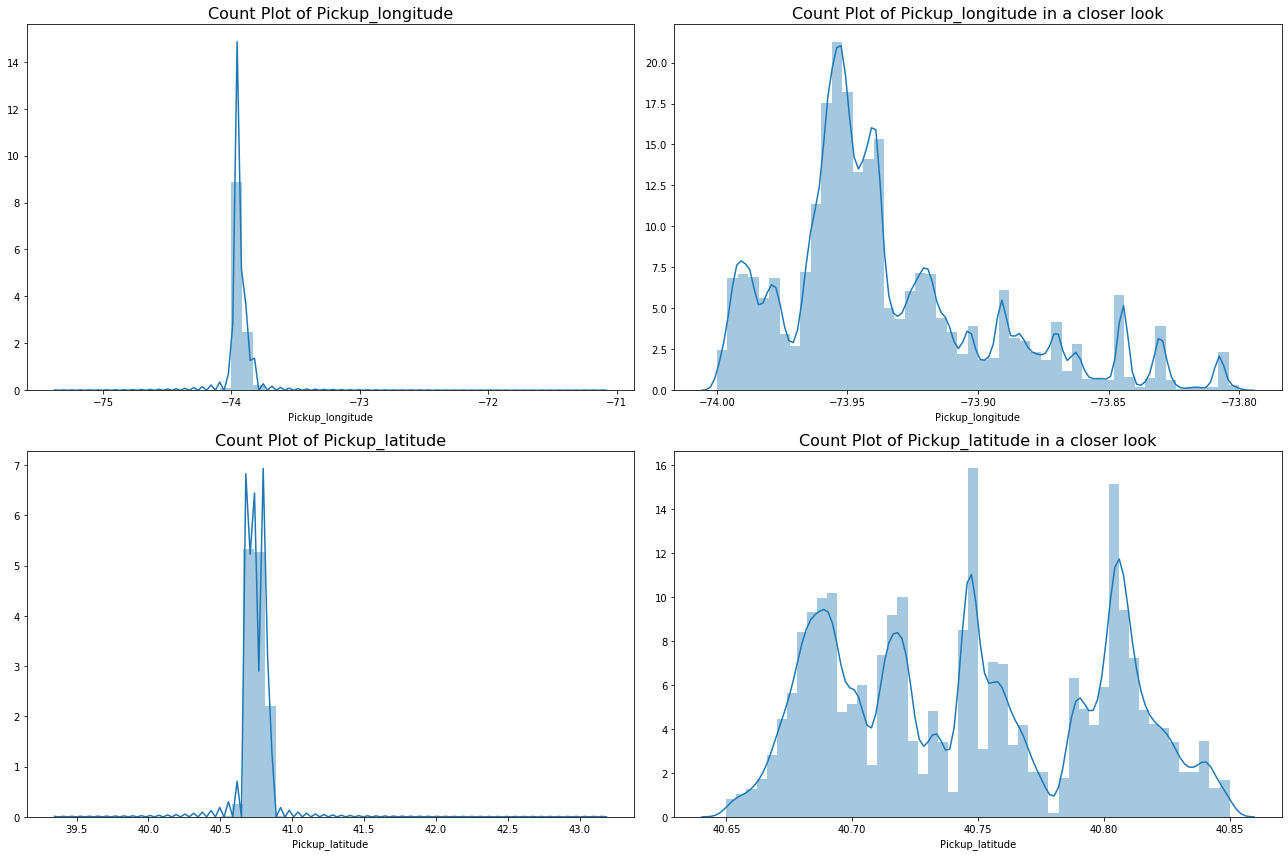

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
sns.distplot(df['Pickup_longitude'], ax = ax[0,0])
ax[0,0].set_title('Count Plot of Pickup_longitude', fontsize=16)

#cst for constraints, same for the code below
cst = (df['Pickup_longitude'] > -74) & (df['Pickup_longitude'] < -73.8)
sns.distplot(df[cst]['Pickup_longitude'], ax = ax[0,1])
ax[0,1].set_title('Count Plot of Pickup_longitude in a closer look', fontsize=16)

sns.distplot(df['Pickup_latitude'], ax = ax[1,0])
ax[1,0].set_title('Count Plot of Pickup_latitude', fontsize=16)

cst = (df['Pickup_latitude'] > 40.65) & (df['Pickup_latitude'] < 40.85)
sns.distplot(df[cst]['Pickup_latitude'], ax = ax[1,1])
ax[1,1].set_title('Count Plot of Pickup_latitude in a closer look', fontsize=16)
plt.tight_layout()

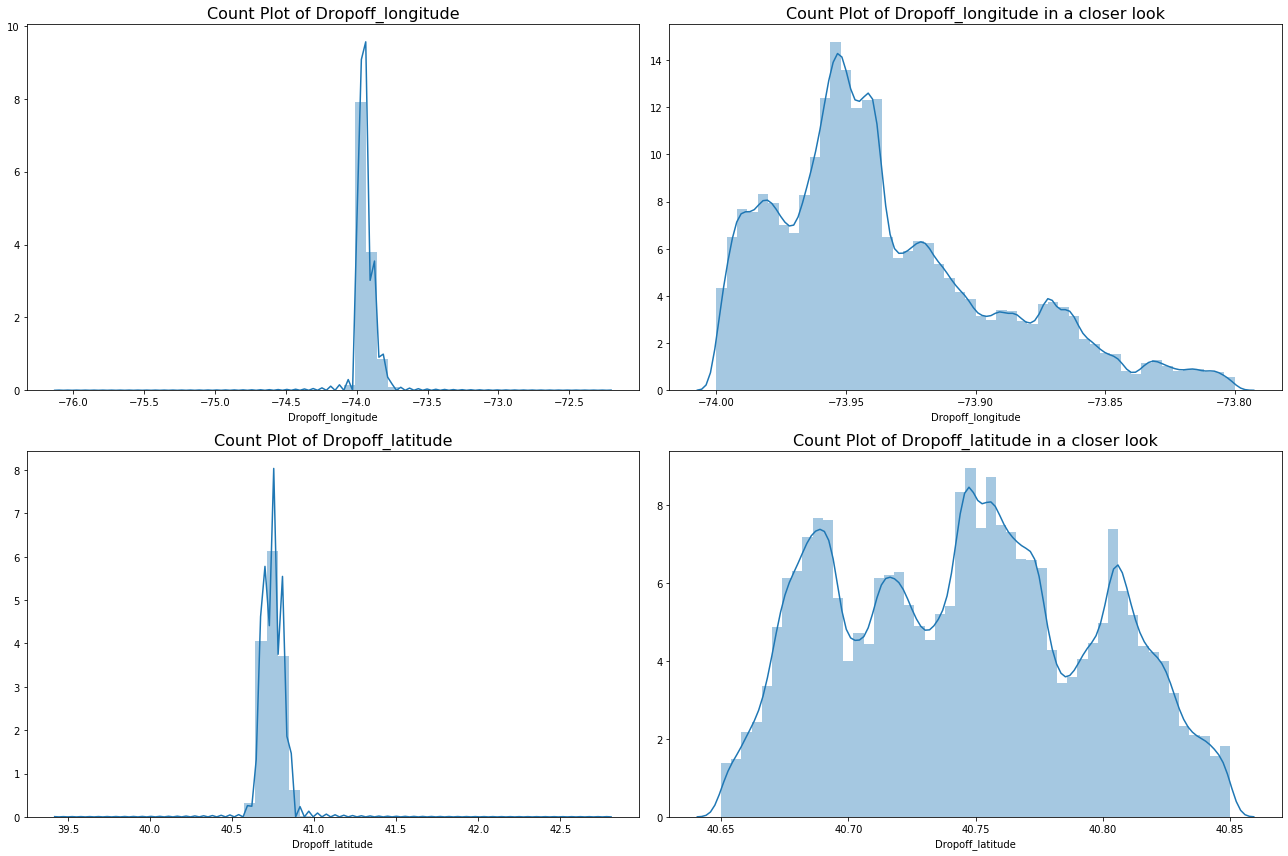

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
sns.distplot(df['Dropoff_longitude'], ax = ax[0,0])
ax[0,0].set_title('Count Plot of Dropoff_longitude', fontsize=16)

cst = (df['Dropoff_longitude'] > -74) & (df['Dropoff_longitude'] < -73.8)
sns.distplot(df[cst]['Dropoff_longitude'], ax = ax[0,1])
ax[0,1].set_title('Count Plot of Dropoff_longitude in a closer look', fontsize=16)

sns.distplot(df['Dropoff_latitude'], ax = ax[1,0])
ax[1,0].set_title('Count Plot of Dropoff_latitude', fontsize=16)

cst = (df['Dropoff_latitude'] > 40.65) & (df['Dropoff_latitude'] < 40.85)
sns.distplot(df[cst]['Dropoff_latitude'], ax = ax[1,1])
ax[1,1].set_title('Count Plot of Dropoff_latitude in a closer look', fontsize=16)
plt.tight_layout()

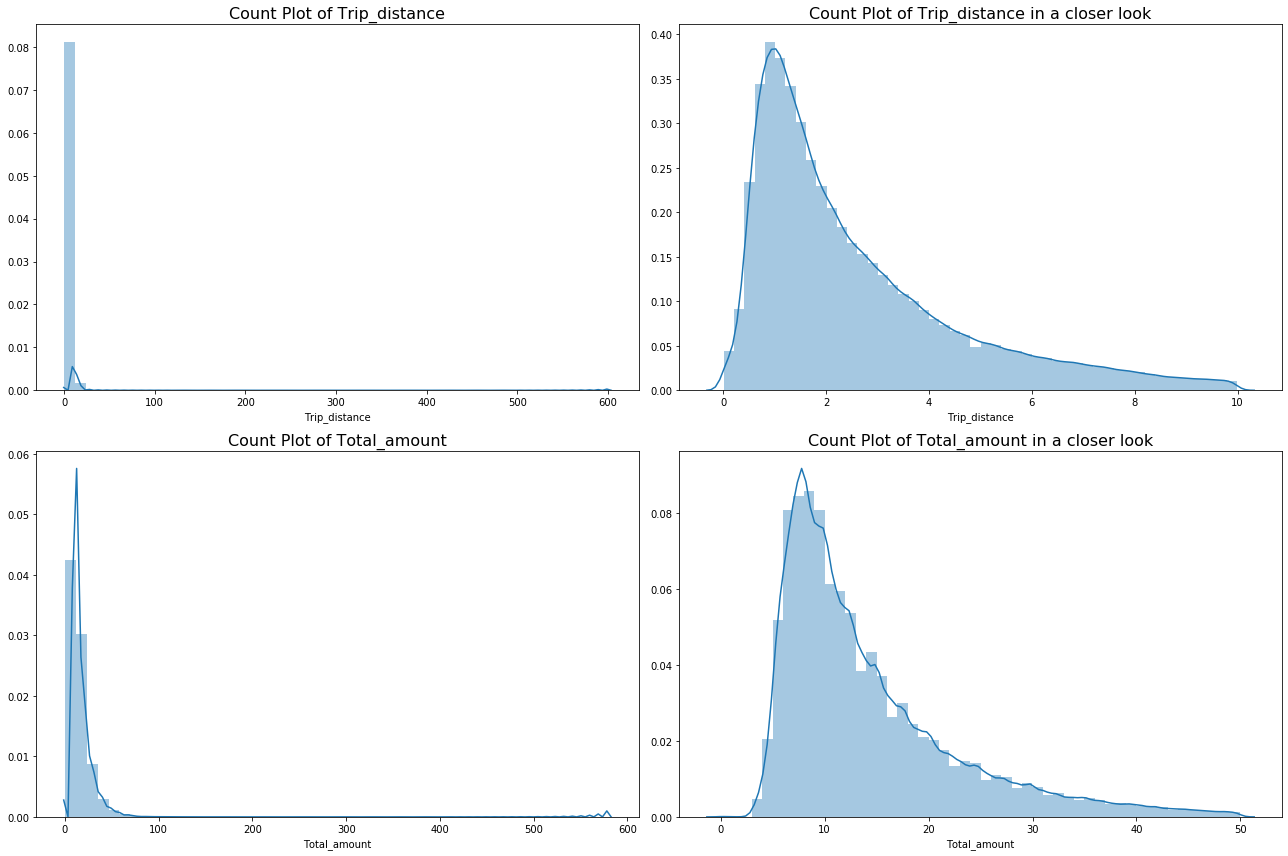

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
sns.distplot(df['Trip_distance'], ax = ax[0,0])
ax[0,0].set_title('Count Plot of Trip_distance', fontsize=16)

cst = (df['Trip_distance'] <10)
sns.distplot(df[cst]['Trip_distance'], ax = ax[0,1])
ax[0,1].set_title('Count Plot of Trip_distance in a closer look', fontsize=16)

sns.distplot(df['Total_amount'], ax = ax[1,0])
ax[1,0].set_title('Count Plot of Total_amount', fontsize=16)

cst = (df['Total_amount'] < 50)
sns.distplot(df[cst]['Total_amount'], ax = ax[1,1])
ax[1,1].set_title('Count Plot of Total_amount in a closer look', fontsize=16)
plt.tight_layout()

### From the plots above, we could see the distribution of trip distance and total amount is significantly similar, which implies a linear correlaiton between them.

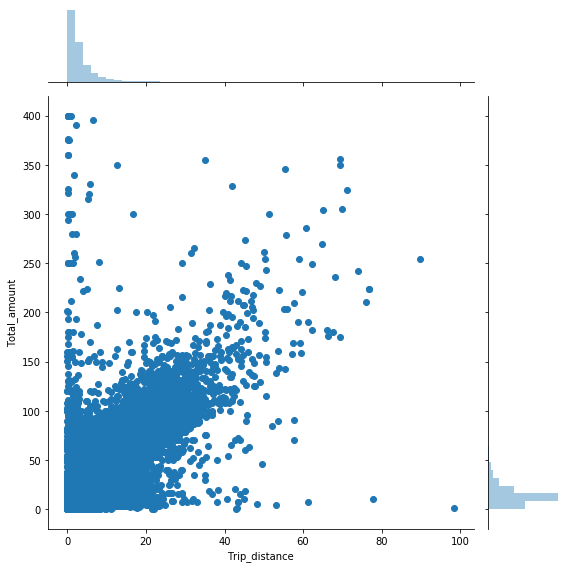

In [16]:
df_cst = df[(df['Trip_distance']<=100) & (df['Total_amount']<=400)]
sns.jointplot(x='Trip_distance', y='Total_amount', data=df_cst, kind='scatter', size=8)
plt.tight_layout()

### A scatterplot is thus drawn and these two factors are indeed highly correlated with each other.

## 3. Find interesting trip statistics grouped by hour

In [17]:
df['Pickup_hour'] = df['Pickup_datetime'].map(lambda x:x.hour)
df['Dropoff_hour'] = df['Dropoff_datetime'].map(lambda x:x.hour)

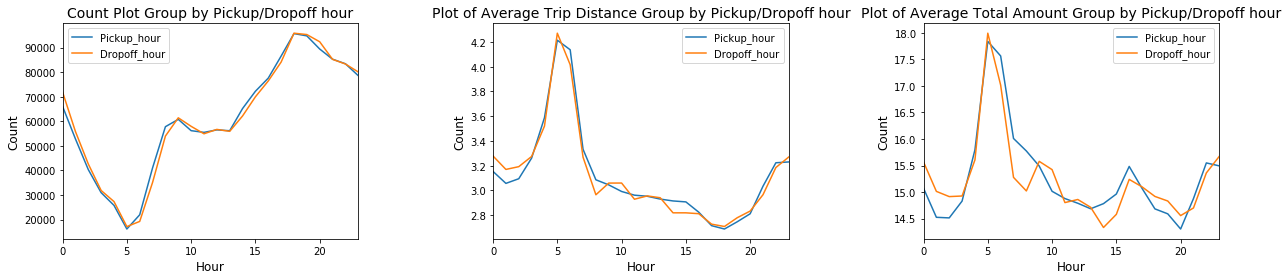

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
df.groupby(['Pickup_hour']).count()['VendorID'].plot(ax = ax[0], label = 'Pickup_hour')
df.groupby(['Dropoff_hour']).count()['VendorID'].plot(ax = ax[0], label = 'Dropoff_hour')
ax[0].set_xlabel('Hour', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot Group by Pickup/Dropoff hour', fontsize=14)
ax[0].legend()

df.groupby(['Pickup_hour']).mean()['Trip_distance'].plot(ax = ax[1], label = 'Pickup_hour')
df.groupby(['Dropoff_hour']).mean()['Trip_distance'].plot(ax = ax[1], label = 'Dropoff_hour')
ax[1].set_xlabel('Hour', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].set_title('Plot of Average Trip Distance Group by Pickup/Dropoff hour', fontsize=14)
ax[1].legend()

df.groupby(['Pickup_hour']).mean()['Total_amount'].plot(ax = ax[2], label = 'Pickup_hour')
df.groupby(['Dropoff_hour']).mean()['Total_amount'].plot(ax = ax[2], label = 'Dropoff_hour')
ax[2].set_xlabel('Hour', fontsize=12)
ax[2].set_ylabel('Count', fontsize=12)
ax[2].set_title('Plot of Average Total Amount Group by Pickup/Dropoff hour', fontsize=14)
ax[2].legend()
plt.tight_layout()

### From the plots above, we can find that the count of trips and the average trip distance and total amount is negatively correlated. The count of trips reaches the lowest point at 5 AM while the average trip distance and total amount reaches the highest point at 5 AM, which makes sense because citizens that took taxi in early morning usually have the need to go to train station or airport. Thus the taxi driver could use this statistics to help improve their incomes.

## 4. The taxi drivers want to know what kind of trip yields better trips. Can you build a model for them and explain the model?

### To train the model, we need to further clean the dataset and do the feature engineering work.
### I selected the geolocations, passenger_count, trip_distance, pickup hour, pickup dayof week and tip_amount as the initial input of the model.

In [20]:
df_clean = df.copy()
cols = ['Pickup_longitude', 'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count', 'Trip_distance', \
        'Pickup_hour', 'dayofweek', 'Tip_amount']
df_clean = df_clean[cols]
df_clean.rename(columns={'Pickup_hour': 'hour'}, inplace=True)

#From the plots above, we found the number of trips that have more than 6 passengers is extremely small, so
#those trips that have more than 6 passengers will be deleted.
df_clean = df_clean[df_clean['Passenger_count'] <= 6]

#Constraint the data point to be in New York and remove the outliers
df_clean = df_clean[(df_clean['Pickup_longitude'] <= -73.7) & (df_clean['Pickup_longitude'] >= -74.1) & \
                 (df_clean['Dropoff_longitude'] <= -73.7) & (df_clean['Dropoff_longitude'] >= -74.1) & \
                (df_clean['Pickup_latitude'] <= 40.9) & (df_clean['Pickup_latitude'] >= 40.6) & \
                (df_clean['Dropoff_latitude']<= 40.9) & (df_clean['Dropoff_latitude'] >= 40.6)]
df_clean.head()

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,hour,dayofweek,Tip_amount
0,-73.921410,40.766708,-73.914413,40.764687,1,0.59,0,1,0.50
1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,0,1,0.00
2,-73.955482,40.714046,-73.944412,40.714729,1,0.61,0,1,0.00
3,-73.945297,40.808186,-73.937668,40.821198,1,1.07,0,1,1.36
4,-73.890877,40.746426,-73.876923,40.756306,1,1.43,0,1,0.00


### Besides these features, I believe the distance to the nearby airports is also a crucial facotor to consider.

In [20]:
from math import radians, cos, sin, asin, sqrt


def calculate_dist(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r


def airport_dist(df):
    JFK = (-73.7781, 40.6413)
    EWR = (-74.1745, 40.6895)
    LGR = (-73.8740, 40.7769)

    list1, list2, list3, list4, list5, list6 = ([] for i in range(6))

    for i in df.itertuples():
        list1.append(calculate_dist(JFK[0], JFK[1], i[1], i[2]))
        list2.append(calculate_dist(JFK[0], JFK[1], i[3], i[4]))
        list3.append(calculate_dist(EWR[0], EWR[1], i[1], i[2]))
        list4.append(calculate_dist(EWR[0], EWR[1], i[3], i[4]))
        list5.append(calculate_dist(LGR[0], LGR[1], i[1], i[2]))
        list6.append(calculate_dist(LGR[0], LGR[1], i[3], i[4]))

    df['pickup_dist_to_JFK'] = list1
    df['dropoff_dist_to_JFK'] = list2
    df['pickup_dist_to_EWR'] = list3
    df['dropoff_dist_to_EWR'] = list4
    df['pickup_dist_to_LGR'] = list5
    df['dropoff_dist_to_LGR'] = list6

    return df


df_clean = airport_dist(df_clean)
df_clean.head()

,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,hour,dayofweek,Tip_amount,pickup_dist_to_JFK,dropoff_dist_to_JFK,pickup_dist_to_EWR,dropoff_dist_to_EWR,pickup_dist_to_LGR,dropoff_dist_to_LGR
0,-73.921410,40.766708,-73.914413,40.764687,1,0.59,0,1,0.50,18.449714,17.896248,22.989835,23.456994,4.150077,3.664222
1,-73.921387,40.766678,-73.931427,40.771584,1,0.74,0,1,0.00,18.445887,19.414099,22.990362,22.423464,4.149152,4.871737
2,-73.955482,40.714046,-73.944412,40.714729,1,0.61,0,1,0.00,17.005541,16.228472,18.663494,19.597766,9.796180,9.109100
3,-73.945297,40.808186,-73.937668,40.821198,1,1.07,0,1,1.36,23.299623,24.102386,23.387103,24.746555,6.937335,7.278991
4,-73.890877,40.746426,-73.876923,40.756306,1,1.43,0,1,0.00,15.068032,15.262342,24.727081,26.154440,3.674639,2.303172


In [21]:
seed = 200
train = df_clean.sample(frac=0.8, random_state=seed)
test = df_clean.drop(train.index)
X_train, X_test, y_train, y_test = train_test_split(train.drop('Tip_amount',axis=1),
                                                    train['Tip_amount'],
                                                    random_state=42)

In [22]:
params = {'max_depth':7,
         'eta':0.03,
         'subsample':1,
         'colsample_bytree':0.9,
         'objective':'reg:linear',
         'eval_metric':'rmse',
         'silent':0}

In [23]:
def XGBmodel(X_train, X_test, y_train, y_test, params):
    matrix_train = xgb.DMatrix(X_train, label=y_train)
    matrix_test = xgb.DMatrix(X_test, label=y_test)
    model = xgb.train(params = params, dtrain = matrix_train, num_boost_round = 5000, \
                      early_stopping_rounds=10, evals = [(matrix_test, 'test')])
    return model


model = XGBmodel(X_train, X_test, y_train, y_test, params)

[20:47:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	test-rmse:2.31264
Will train until test-rmse hasn't improved in 10 rounds.
[1]	test-rmse:2.29232
[2]	test-rmse:2.27505
[3]	test-rmse:2.25672
[4]	test-rmse:2.23933
[5]	test-rmse:2.22256
[6]	test-rmse:2.2068
[7]	test-rmse:2.19196
[8]	test-rmse:2.17776
[9]	test-rmse:2.16434
[10]	test-rmse:2.15154
[11]	test-rmse:2.1396
[12]	test-rmse:2.12911
[13]	test-rmse:2.11806
[14]	test-rmse:2.10888
[15]	test-rmse:2.09906
[16]	test-rmse:2.0896
[17]	test-rmse:2.0808
[18]	test-rmse:2.07245
[19]	test-rmse:2.06439
[20]	test-rmse:2.05692
[21]	test-rmse:2.04967
[22]	test-rmse:2.04349
[23]	test-rmse:2.03696
[24]	test-rmse:2.03082
[25]	test-rmse:2.02512
[26]	test-rmse:2.01966
[27]	test-rmse:2.01454
[28]	test-rmse:2.00975
[29]	test-rmse:2.00503
[30]	test-rmse:2.00063
[31]	test-rmse:1.99645
[32]	test-rmse:1.99258
[33]	test-rmse:1.98879
[34]	test-rmse:1.98523
[35]	test-rmse:1.98192
[36]	test-rms

[341]	test-rmse:1.9087
[342]	test-rmse:1.9087
[343]	test-rmse:1.90869
[344]	test-rmse:1.90865
[345]	test-rmse:1.90864
[346]	test-rmse:1.90869
[347]	test-rmse:1.90869
[348]	test-rmse:1.90864
[349]	test-rmse:1.90862
[350]	test-rmse:1.9086
[351]	test-rmse:1.90861
[352]	test-rmse:1.90862
[353]	test-rmse:1.90861
[354]	test-rmse:1.90865
[355]	test-rmse:1.90864
[356]	test-rmse:1.90861
[357]	test-rmse:1.90861
[358]	test-rmse:1.90858
[359]	test-rmse:1.90861
[360]	test-rmse:1.9086
[361]	test-rmse:1.90861
[362]	test-rmse:1.90861
[363]	test-rmse:1.90859
[364]	test-rmse:1.90864
[365]	test-rmse:1.90862
[366]	test-rmse:1.90863
[367]	test-rmse:1.9086
[368]	test-rmse:1.90859
Stopping. Best iteration:
[358]	test-rmse:1.90858



In [24]:
testset_y = test['Tip_amount']
testset_x = test.drop(['Tip_amount'], axis = 1)
pred = model.predict(xgb.DMatrix(testset_x), ntree_limit = model.best_ntree_limit).tolist()
print('RMSE for the test set is :{}'.format(np.sqrt(mean_squared_error(testset_y, pred))))

RMSE for the test set is :1.8712742863131693


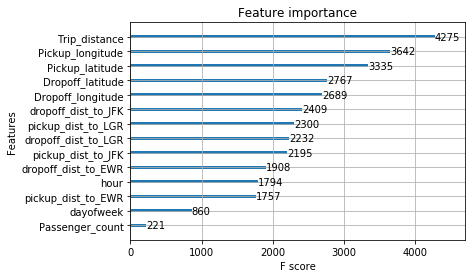

In [25]:
xgb.plot_importance(model)

### From this model, we could find the most important features for getting a good amount of tip are the trip distance and location, which means there would be some areas where people are likely to tip more. I'll explore about this more in the next section.
### Thus, I would suggest the taxi drivers to take more long distance business and select good locations to do business so that they could get more tips.